<div align="center">

  <a href="https://ultralytics.com/yolov5" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov5/v70/splash.png"></a>


<br>
  <a href="https://bit.ly/yolov5-paperspace-notebook"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"></a>
  <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
  <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
<br>

This <a href="https://github.com/ultralytics/yolov5">YOLOv5</a> 🚀 notebook by <a href="https://ultralytics.com">Ultralytics</a> presents simple train, validate and predict examples to help start your AI adventure.<br>We hope that the resources in this notebook will help you get the most out of YOLOv5. Please browse the YOLOv5 <a href="https://docs.ultralytics.com/yolov5">Docs</a> for details, raise an issue on <a href="https://github.com/ultralytics/yolov5">GitHub</a> for support, and join our <a href="https://ultralytics.com/discord">Discord</a> community for questions and discussions!

</div>

# Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
!pip install -r yolov5/requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [5]:




%cd yolov5
#%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
from IPython.display import Image  # for displaying images
import os
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw ,ImageFont
import numpy as np
import matplotlib.pyplot as plt
import cv2

font_path = os.path.join(cv2.__path__[0],'qt','fonts','DejaVuSans.ttf')
random.seed(108)
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-224-g6262c7f Python-3.11.4 torch-2.2.0.dev20230921 CUDA:0 (NVIDIA GeForce RTX 4090, 24215MiB)


Setup complete ✅ (24 CPUs, 125.5 GB RAM, 252.2/1876.2 GB disk)


In [4]:
torch.cuda.is_available()

True

# 1. Detect

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image
                          vid.mp4  # video
                          screen  # screenshot
                          path/  # directory
                         'path/*.jpg'  # glob
                         'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                         'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img align="left" src="https://user-images.githubusercontent.com/26833433/127574988-6a558aa1-d268-44b9-bf6b-62d4c605cc72.jpg" width="600">

# 2. Validate
Validate a model's accuracy on the [COCO](https://cocodataset.org/#home) dataset's `val` or `test` splits. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). To show results by class use the `--verbose` flag.

100%|██████████| 780M/780M [00:07<00:00, 110MB/s]


# 3. Train

<p align=""><a href="https://bit.ly/ultralytics_hub"><img width="1000" src="https://github.com/ultralytics/assets/raw/main/im/integrations-loop.png"/></a></p>
Close the active learning loop by sampling images from your inference conditions with the `roboflow` pip package
<br><br>

Train a YOLOv5s model on the [COCO128](https://www.kaggle.com/ultralytics/coco128) dataset with `--data coco128.yaml`, starting from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights '' --cfg yolov5s.yaml`.

- **Pretrained [Models](https://github.com/ultralytics/yolov5/tree/master/models)** are downloaded
automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases)
- **[Datasets](https://github.com/ultralytics/yolov5/tree/master/data)** available for autodownload include: [COCO](https://github.com/ultralytics/yolov5/blob/master/data/coco.yaml), [COCO128](https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml), [VOC](https://github.com/ultralytics/yolov5/blob/master/data/VOC.yaml), [Argoverse](https://github.com/ultralytics/yolov5/blob/master/data/Argoverse.yaml), [VisDrone](https://github.com/ultralytics/yolov5/blob/master/data/VisDrone.yaml), [GlobalWheat](https://github.com/ultralytics/yolov5/blob/master/data/GlobalWheat2020.yaml), [xView](https://github.com/ultralytics/yolov5/blob/master/data/xView.yaml), [Objects365](https://github.com/ultralytics/yolov5/blob/master/data/Objects365.yaml), [SKU-110K](https://github.com/ultralytics/yolov5/blob/master/data/SKU-110K.yaml).
- **Training Results** are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.
<br>

A **Mosaic Dataloader** is used for training which combines 4 images into 1 mosaic.

## Label a dataset on Roboflow (optional)

[Roboflow](https://roboflow.com/?ref=ultralytics) enables you to easily **organize, label, and prepare** a high quality dataset with your own custom data. Roboflow also makes it easy to establish an active learning pipeline, collaborate with your team on dataset improvement, and integrate directly into your model building workflow with the `roboflow` pip package.

# 4. Visualize

## Comet Logging and Visualization 🌟 NEW

[Comet](https://www.comet.com/site/lp/yolov5-with-comet/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab) is now fully integrated with YOLOv5. Track and visualize model metrics in real time, save your hyperparameters, datasets, and model checkpoints, and visualize your model predictions with [Comet Custom Panels](https://www.comet.com/docs/v2/guides/comet-dashboard/code-panels/about-panels/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab)! Comet makes sure you never lose track of your work and makes it easy to share results and collaborate across teams of all sizes!

Getting started is easy:
```shell
pip install comet_ml  # 1. install
export COMET_API_KEY=<Your API Key>  # 2. paste API key
python train.py --img 640 --epochs 3 --data coco128.yaml --weights yolov5s.pt  # 3. train
```
To learn more about all of the supported Comet features for this integration, check out the [Comet Tutorial](https://docs.ultralytics.com/yolov5/tutorials/comet_logging_integration). If you'd like to learn more about Comet, head over to our [documentation](https://www.comet.com/docs/v2/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab). Get started by trying out the Comet Colab Notebook:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1RG0WOQyxlDlo5Km8GogJpIEJlg_5lyYO?usp=sharing)

<a href="https://bit.ly/yolov5-readme-comet2">
<img alt="Comet Dashboard" src="https://user-images.githubusercontent.com/26833433/202851203-164e94e1-2238-46dd-91f8-de020e9d6b41.png" width="1280"/></a>

## ClearML Logging and Automation 🌟 NEW

[ClearML](https://cutt.ly/yolov5-notebook-clearml) is completely integrated into YOLOv5 to track your experimentation, manage dataset versions and even remotely execute training runs. To enable ClearML (check cells above):

- `pip install clearml`
- run `clearml-init` to connect to a ClearML server (**deploy your own [open-source server](https://github.com/allegroai/clearml-server)**, or use our [free hosted server](https://cutt.ly/yolov5-notebook-clearml))

You'll get all the great expected features from an experiment manager: live updates, model upload, experiment comparison etc. but ClearML also tracks uncommitted changes and installed packages for example. Thanks to that ClearML Tasks (which is what we call experiments) are also reproducible on different machines! With only 1 extra line, we can schedule a YOLOv5 training task on a queue to be executed by any number of ClearML Agents (workers).

You can use ClearML Data to version your dataset and then pass it to YOLOv5 simply using its unique ID. This will help you keep track of your data without adding extra hassle. Explore the [ClearML Tutorial](https://docs.ultralytics.com/yolov5/tutorials/clearml_logging_integration) for details!

<a href="https://cutt.ly/yolov5-notebook-clearml">
<img alt="ClearML Experiment Management UI" src="https://github.com/thepycoder/clearml_screenshots/raw/main/scalars.jpg" width="1280"/></a>

## Local Logging

Training results are automatically logged with [Tensorboard](https://www.tensorflow.org/tensorboard) and [CSV](https://github.com/ultralytics/yolov5/pull/4148) loggers to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc.

This directory contains train and val statistics, mosaics, labels, predictions and augmentated mosaics, as well as metrics and charts including precision-recall (PR) curves and confusion matrices.

<img alt="Local logging results" src="https://user-images.githubusercontent.com/26833433/183222430-e1abd1b7-782c-4cde-b04d-ad52926bf818.jpg" width="1280"/>




```
# 此內容會顯示為程式碼
```

# Environments

YOLOv5 may be run in any of the following up-to-date verified environments (with all dependencies including [CUDA](https://developer.nvidia.com/cuda)/[CUDNN](https://developer.nvidia.com/cudnn), [Python](https://www.python.org/) and [PyTorch](https://pytorch.org/) preinstalled):

- **Notebooks** with free GPU: <a href="https://bit.ly/yolov5-paperspace-notebook"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"></a> <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a> <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
- **Google Cloud** Deep Learning VM. See [GCP Quickstart Guide](https://docs.ultralytics.com/yolov5/environments/google_cloud_quickstart_tutorial/)
- **Amazon** Deep Learning AMI. See [AWS Quickstart Guide](https://docs.ultralytics.com/yolov5/environments/aws_quickstart_tutorial/)
- **Docker Image**. See [Docker Quickstart Guide](https://docs.ultralytics.com/yolov5/environments/docker_image_quickstart_tutorial/) <a href="https://hub.docker.com/r/ultralytics/yolov5"><img src="https://img.shields.io/docker/pulls/ultralytics/yolov5?logo=docker" alt="Docker Pulls"></a>


# Status

![YOLOv5 CI](https://github.com/ultralytics/yolov5/actions/workflows/ci-testing.yml/badge.svg)

If this badge is green, all [YOLOv5 GitHub Actions](https://github.com/ultralytics/yolov5/actions) Continuous Integration (CI) tests are currently passing. CI tests verify correct operation of YOLOv5 training ([train.py](https://github.com/ultralytics/yolov5/blob/master/train.py)), testing ([val.py](https://github.com/ultralytics/yolov5/blob/master/val.py)), inference ([detect.py](https://github.com/ultralytics/yolov5/blob/master/detect.py)) and export ([export.py](https://github.com/ultralytics/yolov5/blob/master/export.py)) on macOS, Windows, and Ubuntu every 24 hours and on every commit.




```
# 此內容會顯示為程式碼
```

# change PASCAL VOC .xml to yolov5 .txt
  
by: https://blog.paperspace.com/train-yolov5-custom-data/

We now write a function to convert information contained in info_dict to YOLO v5 style annotations and write them to a txt file. In case your annotations are different than PASCAL VOC ones, you can write a function to convert them to the info_dict format and use the function below to convert them to YOLO v5 style annotations.

The dataset is produced in ronbdbox format.


In [ ]:
# Function to get the data from XML Annotation
def extract_info_from_xml(xml_file):
    root = ET.parse(xml_file).getroot()

    # Initialise the info dict
    info_dict = {}
    info_dict['bboxes'] = []

    # Parse the XML Tree
    for elem in root:
        # Get the file name
        if elem.tag == "filename":
            info_dict['filename'] = elem.text

        # Get the image size
        elif elem.tag == "size":
            image_size = []
            for subelem in elem:
                image_size.append(int(subelem.text))

            info_dict['image_size'] = tuple(image_size)

        # Get details of the bounding box
        elif elem.tag == "object":
            bbox = {}
            for subelem in elem:
                if subelem.tag == "name":
                    bbox["class"] = subelem.text

                elif subelem.tag == "robndbox":
                    for subsubelem in subelem:
                        bbox[subsubelem.tag] = int(float(subsubelem.text))
            info_dict['bboxes'].append(bbox)

    return info_dict

# Dictionary that maps class names to IDs
'''
class_name_to_id_mapping = {"complete": 0,
                "incomplete": 1,
                           "blurry.complete": 2,
                           "blurry.incomplete" :3 , #
                           "hair":4} # human hair
'''
#xml choose complete

class_name_to_id_mapping = {"complete": 0,
                "incomplete": 1,
                "blurry.complete": 0,
                    "blurry.incomplete" :1 , #
                    "hair":2
                           } # human hair

# change robndbox to yolov5 format
def convert_to_yolov5(info_dict) :
    print_buffer = []

    # For each bounding box
    for b in info_dict["bboxes"]:
        try:
            class_id = class_name_to_id_mapping[b["class"]]
        except KeyError:
            print("Invalid Class. Must be one from ", class_name_to_id_mapping.keys())

        # robndbox format
        # Transform the bbox co-ordinates as per the format required by YOLO v5
        b_center_x = int(b["cx"])
        b_center_y = int(b["cy"])
        b_width = int(b["w"])
        b_height = int(b["h"])

        # Normalise the co-ordinates by the dimensions of the image
        image_w, image_h, image_c = info_dict["image_size"]
        b_center_x /= image_w
        b_center_y /= image_h
        b_width    /= image_w
        b_height   /= image_h

        #Write the bbox details to the file
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))

    # Name of the file which we have to save
    save_file_name = os.path.join("/datt/annotations", info_dict["filename"] + '.txt' )

    # Save the annotation to disk
    print("\n".join(print_buffer), file= open(save_file_name, "w"))

In [ ]:
print(class_name_to_id_mapping)

{'complete': 0, 'incomplete': 1, 'blurry.complete': 0, 'blurry.incomplete': 1, 'hair': 2}


#Now we convert all the xml annotations into YOLO style txt ones.




In [ ]:
# Get the annotationse
annotations = [os.path.join('/data/annotations', x) for x in os.listdir('/data/annotations') if x[-3:] == "xml"]
annotations.sort()
#print(annotations)
# Convert and save the annotations
for ann in tqdm(annotations):
    info_dict = extract_info_from_xml(ann)
    convert_to_yolov5(info_dict)
    #print(info_dict)

annotations = [os.path.join('/data/annotations', x) for x in os.listdir('/data/annotations') if x[-3:] == "txt"]
print(annotations)

100%|██████████| 300/300 [00:01<00:00, 160.54it/s]

['/content/drive/MyDrive/yolov5_stomata_3class/annotations/T16L600_W1_GC1_R2_P100_g103_2.txt', '/content/drive/MyDrive/yolov5_stomata_3class/annotations/T16L600_W1_GC1_R2_P100_g103_6.txt', '/content/drive/MyDrive/yolov5_stomata_3class/annotations/T16L600_W1_GC1_R2_P106_g60_2.txt', '/content/drive/MyDrive/yolov5_stomata_3class/annotations/T16L600_W1_GC1_R2_P106_g60_8.txt', '/content/drive/MyDrive/yolov5_stomata_3class/annotations/T16L600_W1_GC1_R2_P107_g54_4.txt', '/content/drive/MyDrive/yolov5_stomata_3class/annotations/T16L600_W1_GC1_R2_P107_g54_8.txt', '/content/drive/MyDrive/yolov5_stomata_3class/annotations/T16L600_W1_GC1_R2_P110_g88_4.txt', '/content/drive/MyDrive/yolov5_stomata_3class/annotations/T16L600_W1_GC1_R2_P110_g88_7.txt', '/content/drive/MyDrive/yolov5_stomata_3class/annotations/T16L600_W1_GC1_R2_P111_g31_2.txt', '/content/drive/MyDrive/yolov5_stomata_3class/annotations/T16L600_W1_GC1_R2_P111_g31_6.txt', '/content/drive/MyDrive/yolov5_stomata_3class/annotations/T16L600_W

In [ ]:
#Now we convert all the xml annotations into YOLO style txt ones.



In [ ]:
# Get the annotations


#Testing the annotations
Just for a sanity check, let us now test some of these transformed annotations. We randomly load one of the annotations and plot boxes using the transformed annotations, and visually inspect it to see whether our code has worked as intended.

Run the next cell multiple times. Every time, a random annotation is sampled.

In [ ]:
random.seed(0)


#class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))


class_id_to_name_mapping = {0: 'complete', 1: 'incomplete', 2: 'hair'}

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size

    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h

    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]

    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)),outline ="red")

        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])

    plt.imshow(np.array(image))
    plt.show()

# Get any random annotation file
annotation_file = annotations[0]
print(annotations[0])
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("/annotations", "/images").replace("txt", "jpg")
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)



/content/drive/MyDrive/yolov5_stomata_3class/annotations/T16L600_W1_GC1_R2_P100_g103_2.txt


FileNotFoundError: ignored

In [ ]:
# Read images and annotations
images = [os.path.join('/data/images', x) for x in os.listdir('/data/images')]
annotations = [os.path.join('/content/drive/MyDrive/yolov5_stomata_3class/annotations', x) for x in os.listdir('/content/drive/MyDrive/yolov5_stomata_3class/annotations') if x[-3:] == "txt"]

images.sort()
annotations.sort()

# Split the dataset into train-valid-test splits
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

#Create the folders to keep the splits.



In [ ]:
!mkdir /content/drive/MyDrive/yolov5_stomata_3class/images/train /content/drive/MyDrive/yolov5_stomata_3class/images/val /content/drive/MyDrive/yolov5_stomata_3class/images/test /content/drive/MyDrive/yolov5_stomata_3class/annotations/train /content/drive/MyDrive/yolov5_stomata_3class/annotations/val /content/drive/MyDrive/yolov5_stomata_3class/annotations/test


#Move the files to their respective folders.



In [ ]:
#Utility function to move images
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

# Move the splits into their folders
move_files_to_folder(train_images, '/content/drive/MyDrive/yolov5_stomata_3class/images/train')
move_files_to_folder(val_images, '/content/drive/MyDrive/yolov5_stomata_3class/images/val/')
move_files_to_folder(test_images, '/content/drive/MyDrive/yolov5_stomata_3class/images/test/')
move_files_to_folder(train_annotations, '/content/drive/MyDrive/yolov5_stomata_3class/annotations/train/')
move_files_to_folder(val_annotations, '/content/drive/MyDrive/yolov5_stomata_3class/annotations/val/')
move_files_to_folder(test_annotations, '/content/drive/MyDrive/yolov5_stomata_3class/annotations/test/')


## Rename the annotations folder to labels, as this is where YOLO v5 expects the annotations to be located in.

Mounted at /content/drive/
/content/drive/MyDrive


In [ ]:
!mv /content/drive/MyDrive/yolov5_stomata_3class/annotations/ /content/drive/MyDrive/yolov5_stomata_3class/labels


In [ ]:
%cd /content/drive/MyDrive/yolov5

/content/drive/MyDrive/yolov5


In [3]:


!python train.py --img 640 --cfg yolov5x.yaml --hyp hyps/hyp.scratch-high.yaml --batch 32 --epochs 300 --data stomata_3_class.yaml --weights yolov5x.pt --workers 24 --name stomata_det_yolov5m_3class


WARNING ⚠️ failure for parse_version(2.2.0.dev20230921), reverting to deprecated pkg_resources: invalid literal for int() with base 10: ''
WARNING ⚠️ failure for parse_version(2.2.0.dev20230921), reverting to deprecated pkg_resources: invalid literal for int() with base 10: ''
WARNING ⚠️ failure for parse_version(2.2.0.dev20230921), reverting to deprecated pkg_resources: invalid literal for int() with base 10: ''
WARNING ⚠️ invalid check_version(3.1.37, ) requested, please check values.
train: weights=yolov5x.pt, cfg=yolov5x.yaml, data=stomata_3_class.yaml, hyp=hyps/hyp.scratch-high.yaml, epochs=300, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=24, project=runs/train, name=stomata_det_yolov5m_3class, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freez

## yolov5 vs groundtruth

Train data

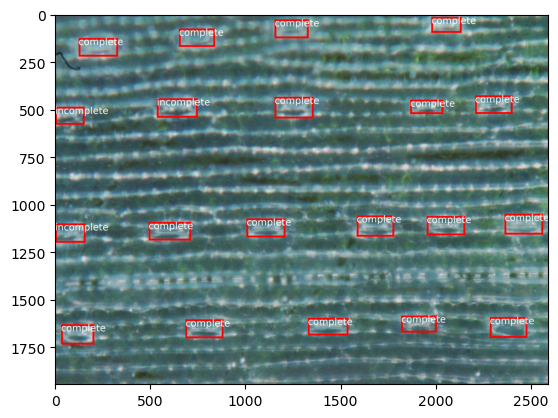

WARNING ⚠️ failure for parse_version(2.2.0.dev20230921), reverting to deprecated pkg_resources: invalid literal for int() with base 10: ''
WARNING ⚠️ failure for parse_version(2.2.0.dev20230921), reverting to deprecated pkg_resources: invalid literal for int() with base 10: ''
WARNING ⚠️ failure for parse_version(2.2.0.dev20230921), reverting to deprecated pkg_resources: invalid literal for int() with base 10: ''
detect: weights=['/home/ray/Yolov5_train_stomata/yolov5/runs/train/stomata_det_yolov5m_3class/weights/best.pt'], source=/home/ray/Yolov5_train_stomata/data/images/test/T16L600_W1_GC1_R2_P97_g47_3.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=Fa

In [5]:
'''
 class_name_to_id_mapping = {"complete": 0,
                "incomplete": 1,
                           "blurry.complete": 2,
                           "blurry.incomplete" :3 , #
                           "hair":4} # human hair
'''
class_id_to_name_mapping = {0: 'complete', 1: 'incomplete', 2: 'hair'}

#class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size

    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h

    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]

    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)),outline ="red",width = 10)

        font = ImageFont.truetype(font_path, size=50)

        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))],font = font)


    plt.imshow(np.array(image))
    plt.show()



annotation_file = '/home/ray/Yolov5_train_stomata/data/labels/test/T16L600_W1_GC1_R2_P97_g47_3.txt'
image_file = '/home/ray/Yolov5_train_stomata/data/images/test/T16L600_W1_GC1_R2_P97_g47_3.jpg'


with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file


#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)



!python detect.py --weights /home/ray/Yolov5_train_stomata/yolov5/runs/train/stomata_det_yolov5m_3class/weights/best.pt --img 640 --conf 0.25 --source /home/ray/Yolov5_train_stomata/data/images/test






In [7]:
!python detect.py --weights /home/ray/Yolov5_train_stomata/yolov5/runs/train/stomata_det_yolov5m_3class/weights/best.pt --img 640 --conf 0.25 --source /home/ray/Yolov5_train_stomata/data/images/test


WARNING ⚠️ failure for parse_version(2.2.0.dev20230921), reverting to deprecated pkg_resources: invalid literal for int() with base 10: ''
WARNING ⚠️ failure for parse_version(2.2.0.dev20230921), reverting to deprecated pkg_resources: invalid literal for int() with base 10: ''
WARNING ⚠️ failure for parse_version(2.2.0.dev20230921), reverting to deprecated pkg_resources: invalid literal for int() with base 10: ''
detect: weights=['/home/ray/Yolov5_train_stomata/yolov5/runs/train/stomata_det_yolov5m_3class/weights/best.pt'], source=/home/ray/Yolov5_train_stomata/data/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
WAR

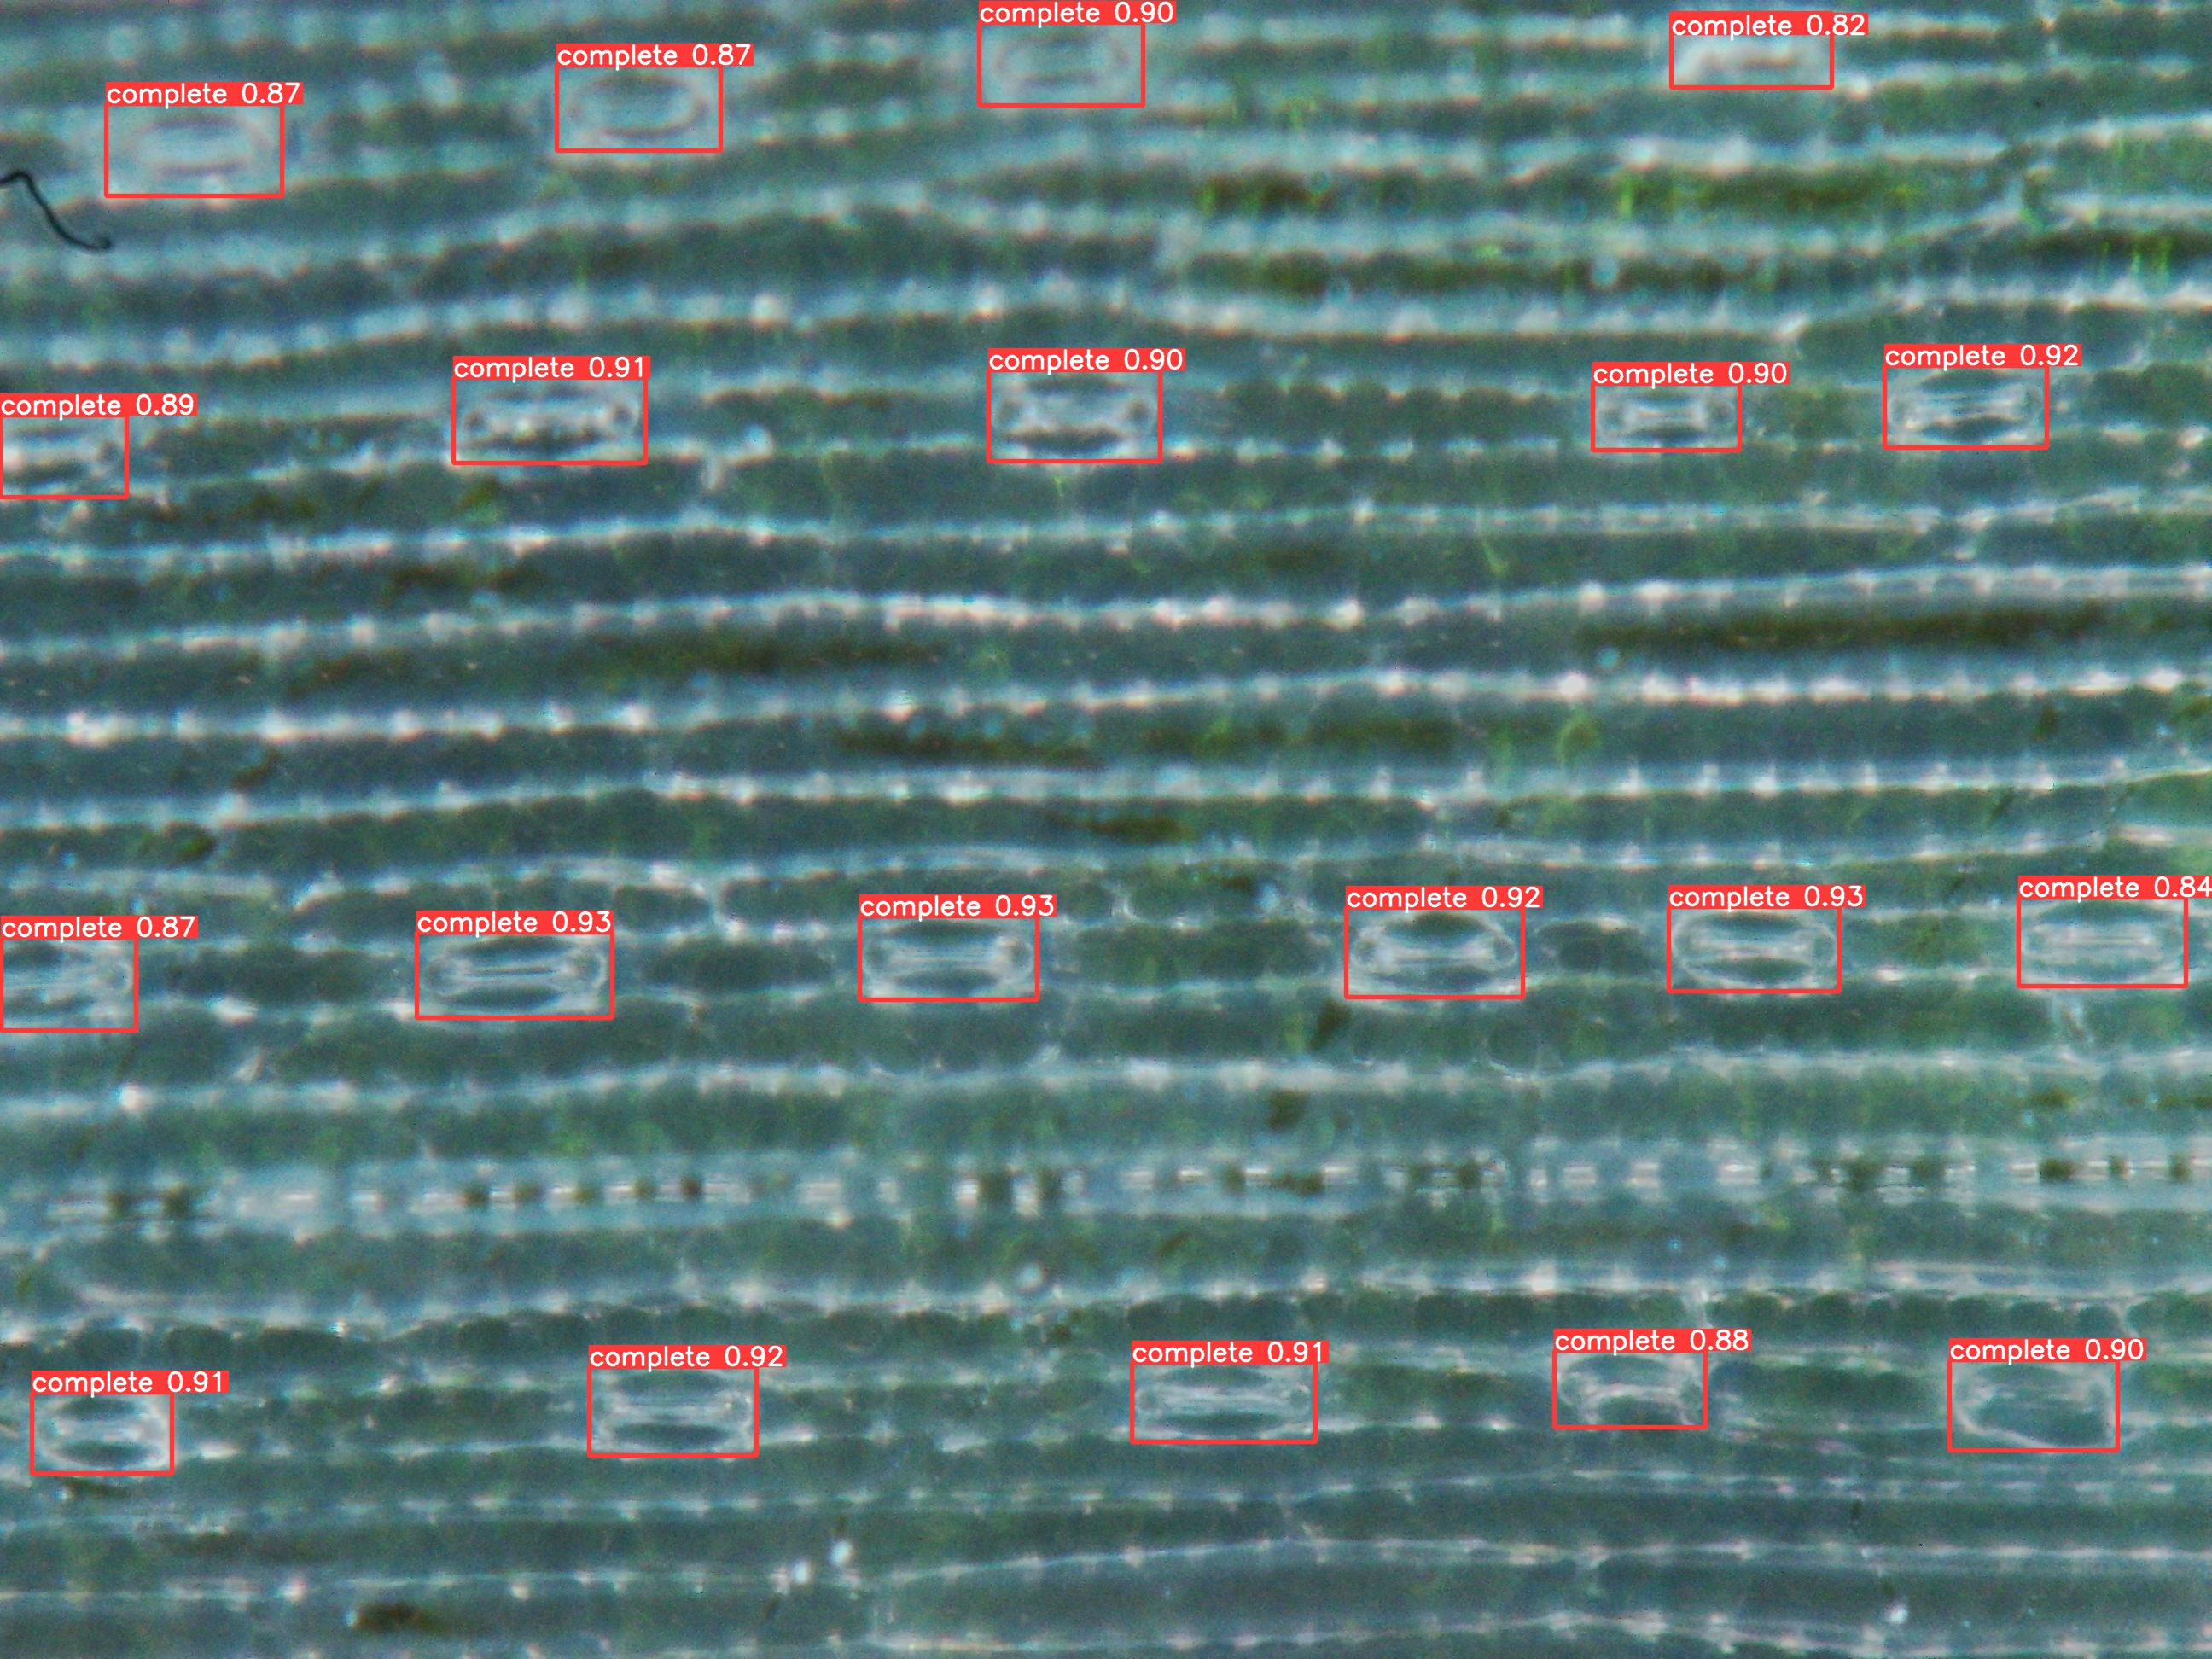

In [6]:






display.Image(filename='/home/ray/Yolov5_train_stomata/yolov5/runs/detect/exp/T16L600_W1_GC1_R2_P97_g47_3.jpg', width=600)

##Test data image

In [11]:


!cd /home/Yolov5_train_stomata

/home/ray/Yolov5_train_stomata
/home/ray/Yolov5_train_stomata


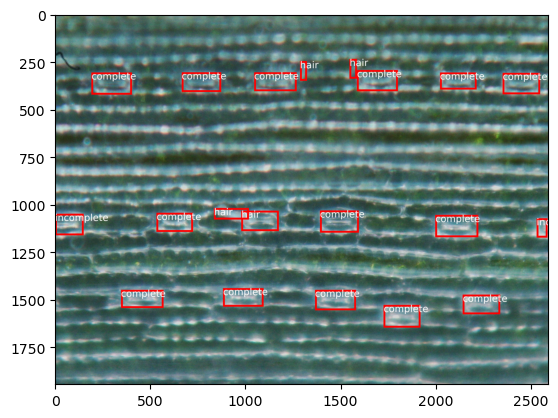

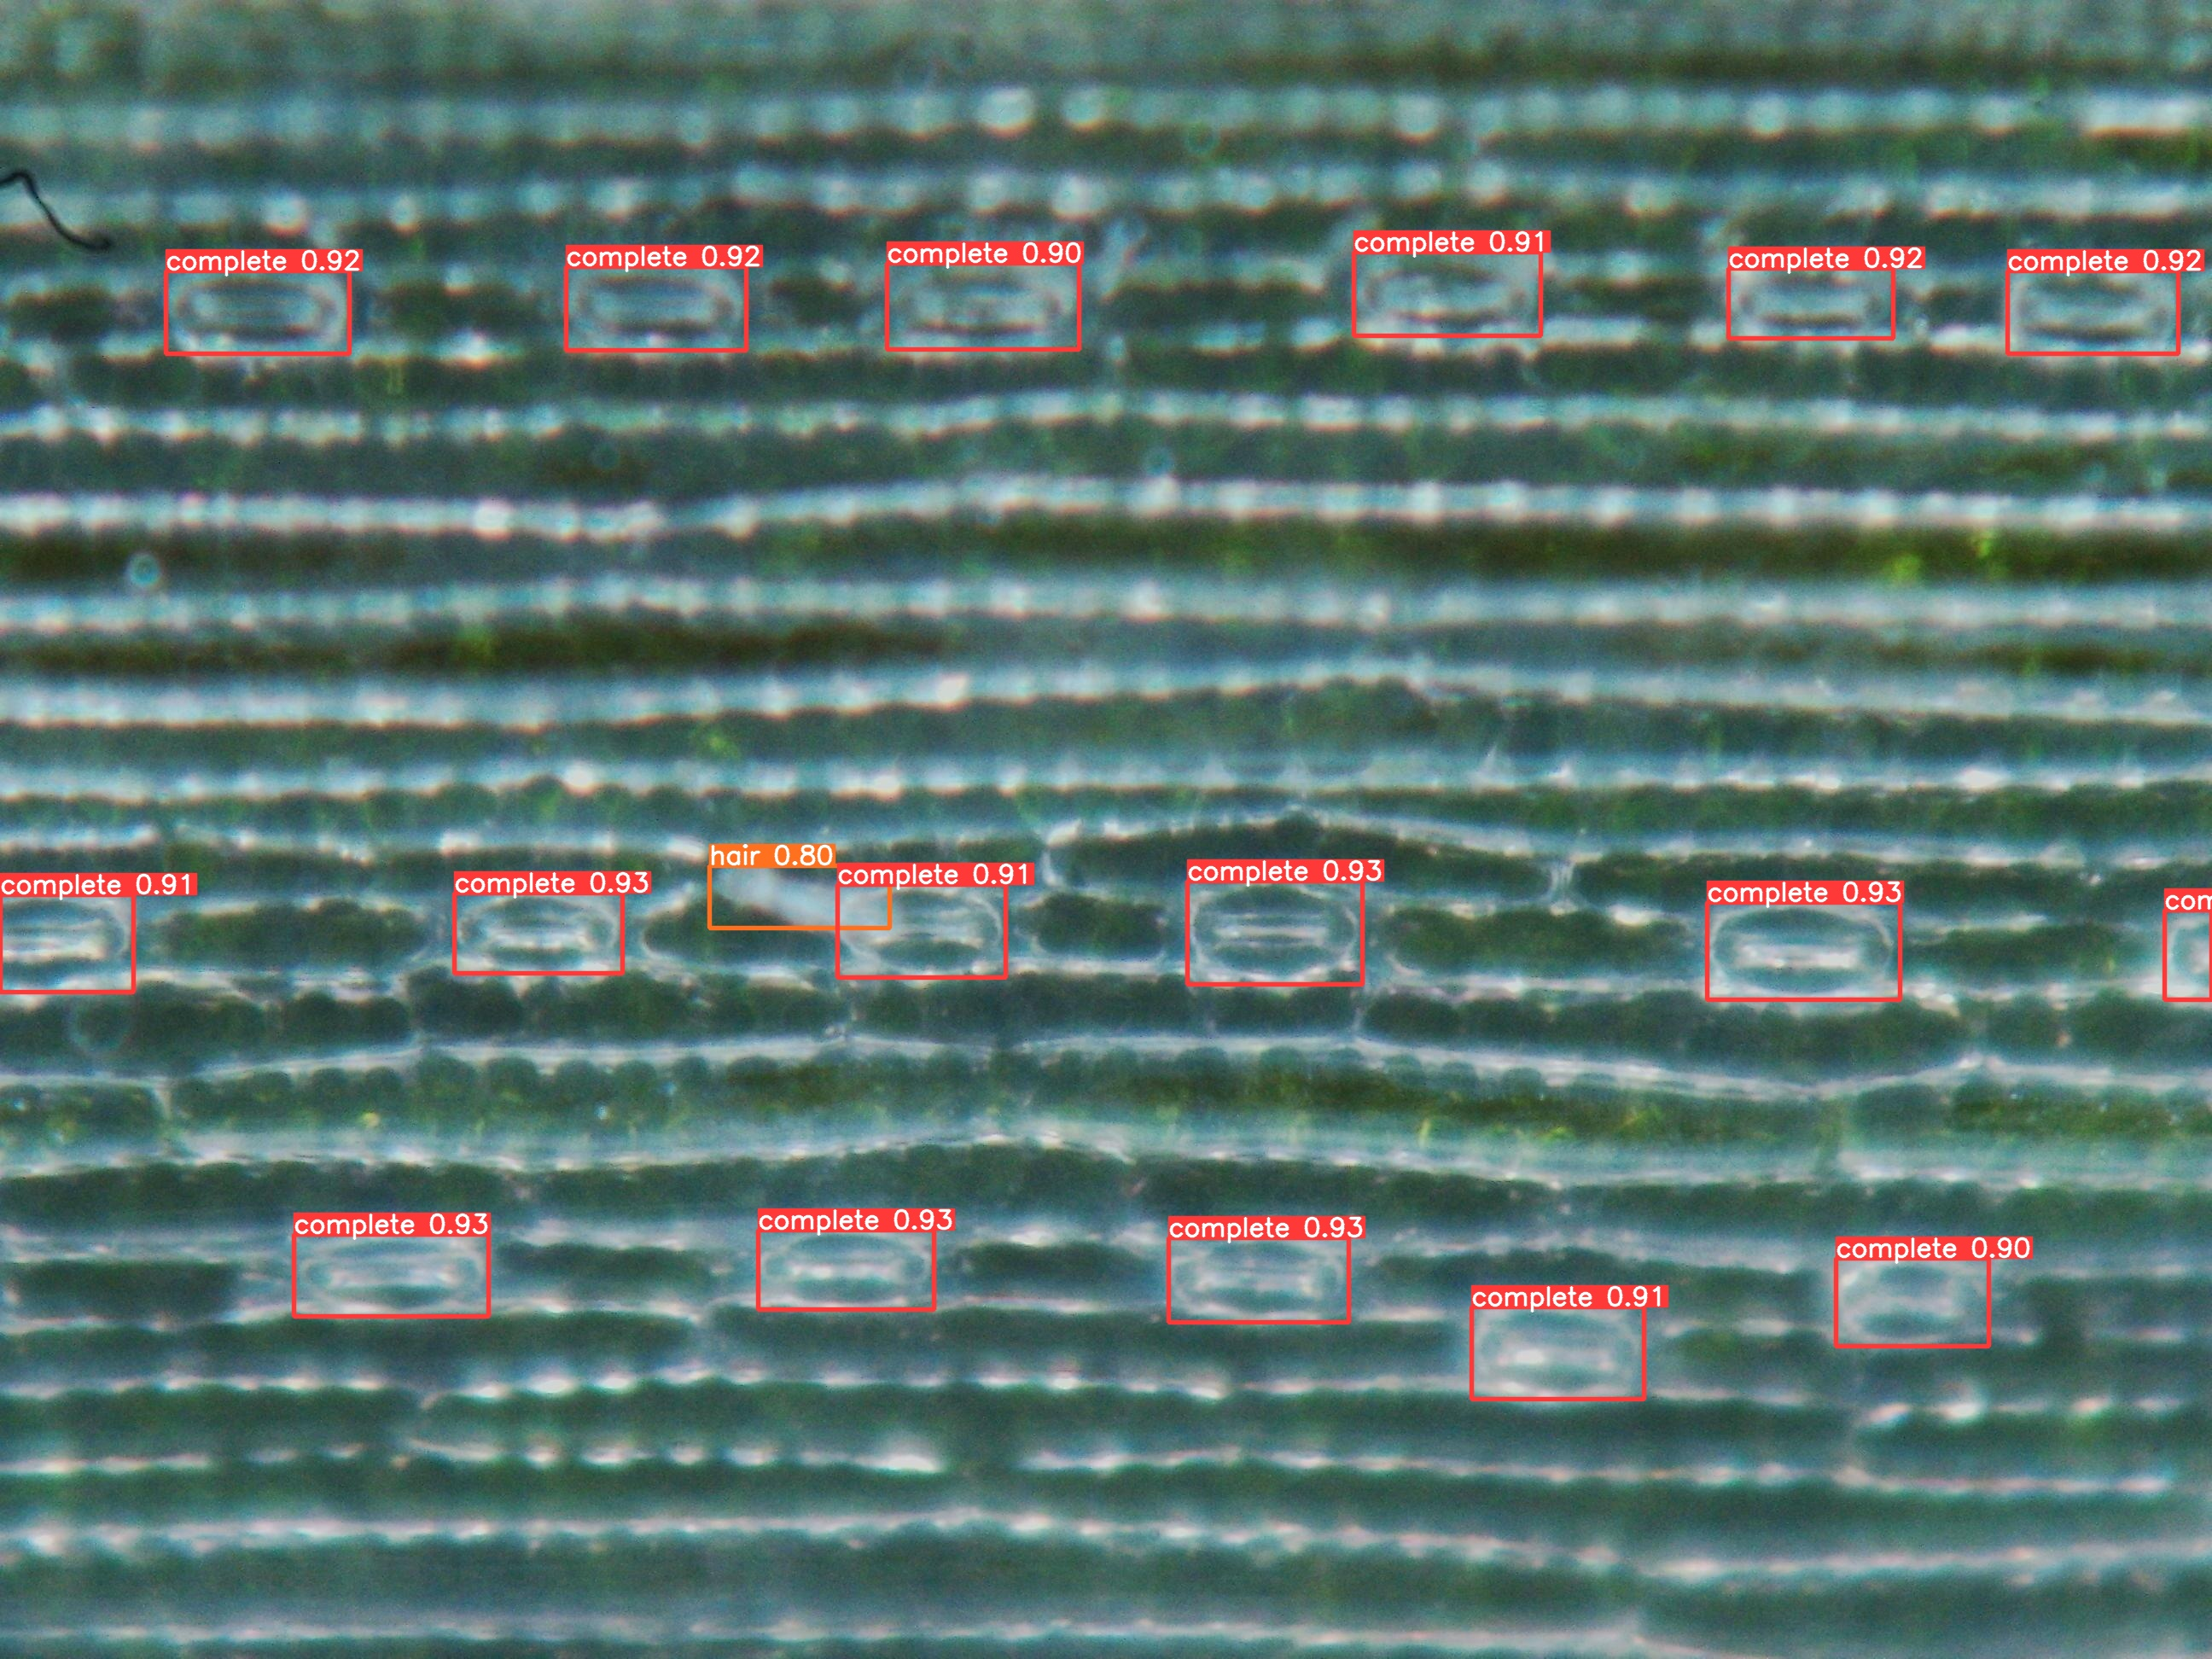

In [23]:
annotation_file = '/home/ray/Yolov5_train_stomata//data/labels/test/T16L600_W1_GC1_R2_P100_g103_2.txt'
image_file = '/home/ray/Yolov5_train_stomata/data/images/test/T16L600_W1_GC1_R2_P100_g103_2.jpg'


with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file


#Load the image
image = Image.open(image_file)

#Plot the Bounding Box

plot_bounding_box(image, annotation_list)
%cd /home/ray/Yolov5_train_stomata/yolov5
!python detect.py --weights /home/ray/Yolov5_train_stomata/yolov5/runs/train/stomata_det_yolov5m_3class/weights/best.pt --img 640 --conf 0.25 --source /home/ray/Yolov5_train_stomata/data/images/test/T16L600_W1_GC1_R2_P100_g103_2.jpg



#!python detect.py --weights /content/drive/MyDrive/yolov5/runs/train/stomata_det_yolov5m/weights/best.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/yolov5_stomata/images/test/T16L600_W1_GC1_R2_P100_g103_2.jpg
display.Image(filename='/home/ray/Yolov5_train_stomata/yolov5/runs/detect/exp4/T16L600_W1_GC1_R2_P100_g103_2.jpg', width=600)